In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("foreign_aid_dataset.csv")
df.replace("-", 0, inplace=True)
date_columns = ["start_actual_isodate"]
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors="coerce")
    df_cleaned = df.dropna()
df_cleaned.to_csv("cleaned_datas.csv", index=False)

In [31]:
df[df['start_actual_isodate'].isnull()]

,_id,project_title,start_actual_isodate,donors_iso2,ad_sector_names,status,transactions_start_year,transactions_end_year,total_commitments,total_disbursements
1,2,Introduction of Clean Energy by Solar Electric...,NaN,Japan International Cooperation Agency,Water supply and sanitation,Implementation,2010,2012,7492575,8196360
5,6,Secondary Towns Integrated Urban Environmental...,NaN,Organization of the Petroleum Exporting Countr...,Other,Implementation,2010,2013,71492230,3821246
9,10,Bagmati Irrigation Project,NaN,Saudi Development Fund,Agriculture,Implementation,2007,2013,16455302,1930295
20,21,Avian Influenza Control Project (Animal Health...,NaN,International Development Association,Agriculture,Completion,2007,2012,9085631,8947855
25,26,High Value Agriculture Project in Hill and Mou...,NaN,International Fund for Agricultural Development,Agriculture,Implementation,2010,2013,14477047,2339841
...,...,...,...,...,...,...,...,...,...,...
857,858,"Peace Rights and Governance Program, Phase Iv ...",NaN,Denmark,Unallocated/ unspecified,Pipeline/identification,-,-,-,-
858,859,SASEC Road Connectivity Project,NaN,Asian Development Bank,Transport and storage,Pipeline/identification,-,-,-,-
860,861,Nepal National Armed Police Academy,NaN,China,"Government and civil society, general",Implementation,2013,2013,33698639,NaN
862,863,Support to discharge of disqualified maois com...,NaN,Norway,"Conflict prevention and resolution, peace and ...",Implementation,-,-,-,-


# Distribution of Project Status

The code represents an analysis of the distribution of project statuses in a dataset of foreign aid projects.The main analysis is visualized using a countplot, which shows the frequency of each project status category. This visualization helps stakeholders understand how many projects fall into each status category, such as "Implementation", "Completion", "Unspecified Project Status","Pipeline" and "Suspended".The use of a logarithmic scale on the y-axis enhances the visualization by compressing the scale for better visibility of the distribution, particularly when dealing with a wide range of project counts across different status categories.


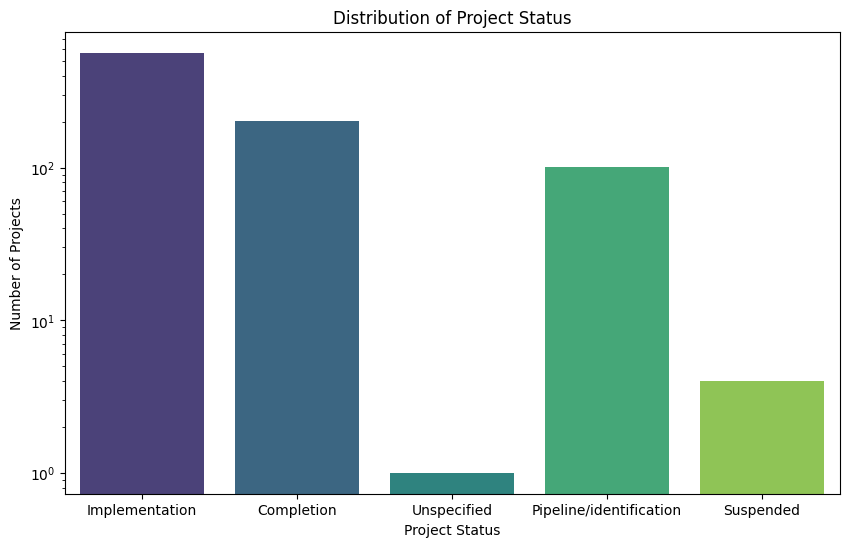

In [363]:
df = pd.read_csv("foreign_aid_dataset.csv")
df["start_actual_isodate"] = pd.to_datetime(df["start_actual_isodate"], errors="coerce")
plt.figure(figsize=(10, 6))
sns.countplot(x="status", data=df, palette="viridis")
plt.title("Distribution of Project Status")
plt.xlabel("Project Status")
plt.ylabel("Number of Projects")
plt.yscale("log")
plt.show()


Based on the graph generated from the provided dataset, it appears that the "Implementation" status is more prevalent compared to other statuses, such as "Suspended". This observation suggests that a significant portion of the projects in the dataset are in the implementation phase.

# Distribution of projects Across Top Ten Sectors

This code helps us understand which types of projects are most common among the top ten sectors in our dataset. It first looks at all the sectors and figures out which ones have the most projects. Then, it filters the data to only include projects from these top sectors. Using a special type of bar graph called a countplot, it shows us how many projects are in each of these top sectors. Each bar represents a sector, and its height shows how many projects are in that sector. By looking at this graph, we can easily see which sectors have the most projects. This helps us understand where aid efforts are focused and which sectors might need more attention.

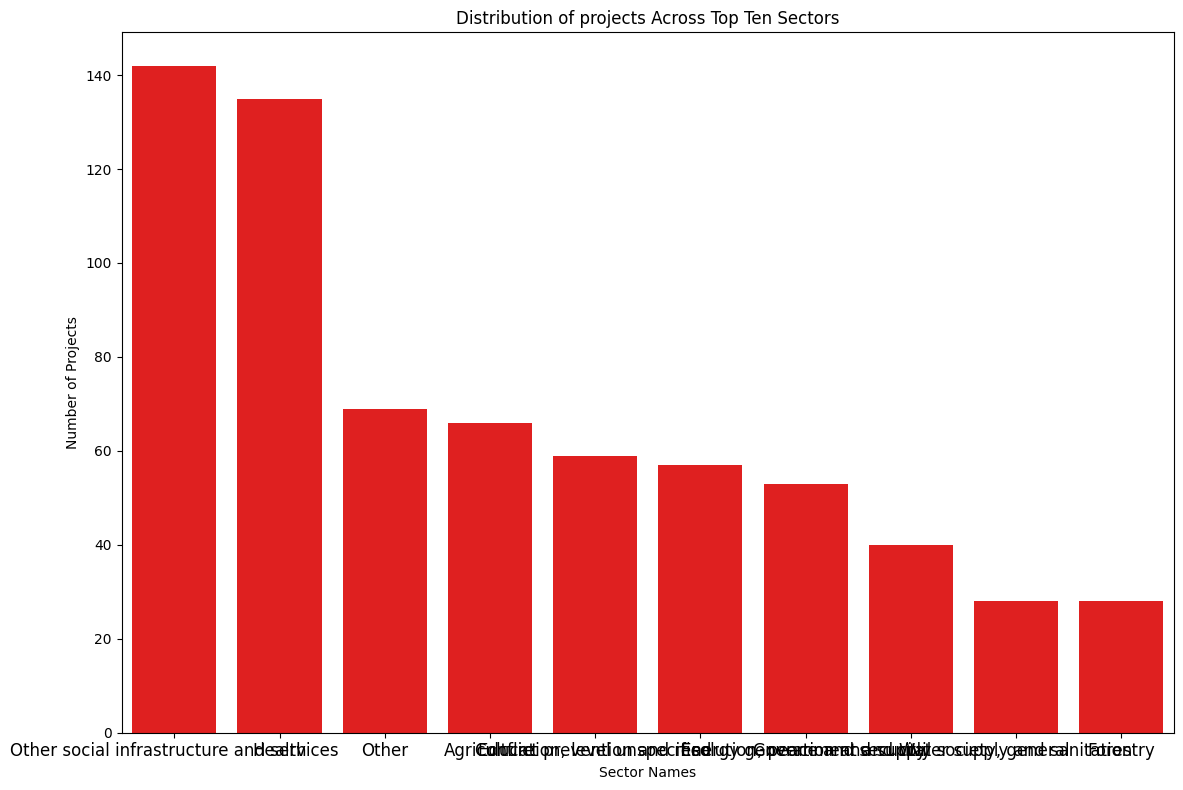

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("foreign_aid_dataset.csv", encoding="latin-1")
top_ten_sectors = data['ad_sector_names'].value_counts().nlargest(10).index
df_top_ten = data[data['ad_sector_names'].isin(top_ten_sectors)]
plt.figure(figsize=(12, 8))
axis = sns.countplot(
    y="ad_sector_names",
    data=df_top_ten,
    order=df_top_ten["ad_sector_names"].value_counts().index,
    color="red",
)
axis.set_yticklabels(axis.get_yticklabels(), size=12)
plt.title("Distribution of projects Across Top Ten Sectors")
plt.xlabel("Number of Projects")
plt.ylabel("Sector Names")
plt.tight_layout()
plt.show()



The analysis conducted using this code revealed the distribution of projects across the top ten sectors. Among these sectors, social infrastructure emerged as the most prominent, with approximately 140 projects attributed to it, followed by health, other, agriculture, education, conflict prevention and resolution, peace and security, energy generation and supply, government and civil society, and water supply and forestry. The number of projects varied across these sectors, with social infrastructure exhibiting the highest count and forestry having the lowest count, ranging between 20 to 40 projects. This breakdown provides valuable insights into the distribution of aid projects, helping stakeholders understand the areas with the highest project activity and potential areas for further investment and intervention.

# Time Trend of Commitments and Disbursements

This code aims to visualize the time trend of commitments and disbursements in a dataset containing foreign aid project information. After loading the dataset and converting the "start_actual_isodate" column to datetime format, it creates a line plot using Seaborn to display the trends in total commitments and total disbursements over time. The x-axis represents the start dates of the projects, while the y-axis represents the corresponding amounts of commitments and disbursements. The two lines on the plot represent the trends for total commitments and total disbursements separately.


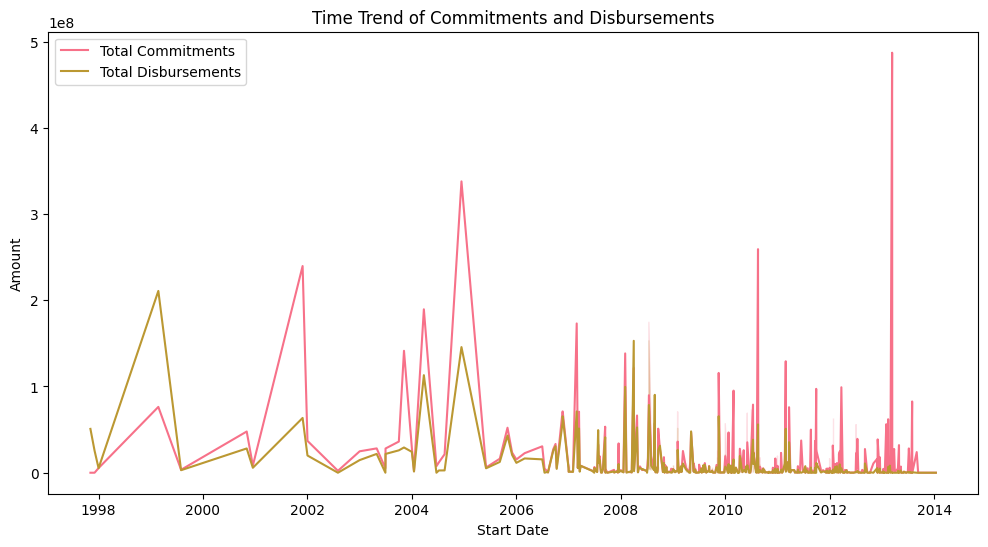

In [20]:
data = pd.read_csv("cleaned_datas.csv", encoding="latin-1")
df = pd.DataFrame(data)


df["start_actual_isodate"] = pd.to_datetime(df["start_actual_isodate"])
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="start_actual_isodate", y="total_commitments", label="Total Commitments", data=df
)
sns.lineplot(
    x="start_actual_isodate",
    y="total_disbursements",
    label="Total Disbursements",
    data=df,
)
plt.title("Time Trend of Commitments and Disbursements")
plt.xlabel("Start Date")
plt.ylabel("Amount")
plt.legend()
plt.show()


When the graph shows a red line at its highest point between 2012 and 2014, and a brown line has its highest point between 1998 and 2000, it indicates distinct periods of significant activity in terms of commitments and disbursements. The peak in commitments during the 2012-2014 period suggests a surge in the allocation of funds for foreign aid projects, possibly indicating a period of increased investment or focus on development initiatives. Conversely, the peak in disbursements during the 1998-2000 period suggests a time when a substantial amount of allocated funds was actually spent or disbursed for project implementation. Analyzing these results can provide insights into the timing and effectiveness of foreign aid projects, highlighting periods of heightened financial activity and potential areas for further investigation or evaluation.

# Distribution of Project Statuses
This code aims to represent the distribution of project statuses using a pie chart visualization. It first calculates the frequency of each project status category in the dataset. Then, it creates a pie chart where each slice corresponds to a project status category, and the size of each slice represents the proportion of projects with that status relative to the total number of projects. The autopct parameter adds percentage labels to each slice, indicating the percentage of projects belonging to each status category.

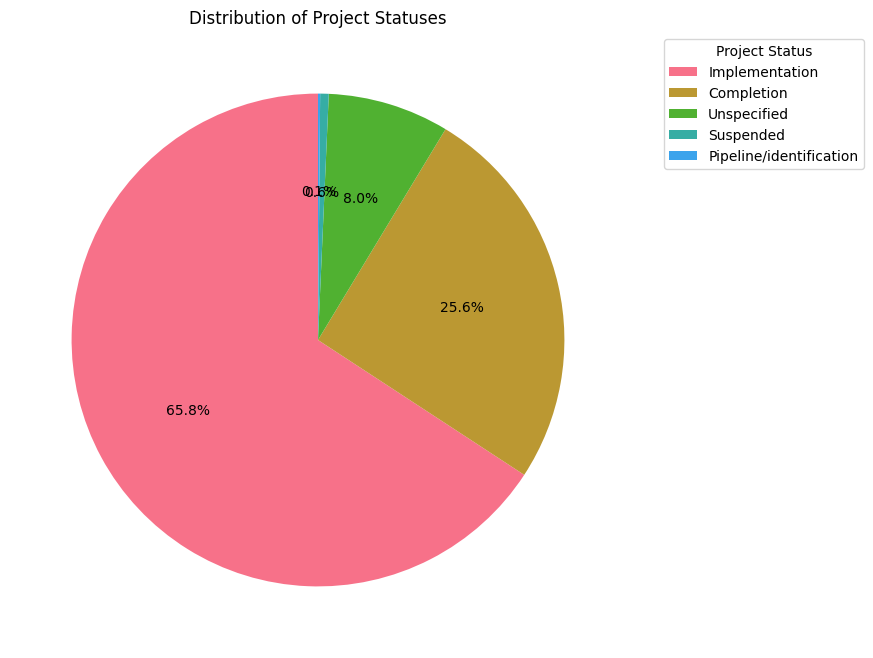

In [21]:
plt.figure(figsize=(8, 8))
df["status"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90, labels=None
)
plt.legend(
    title="Project Status",
    labels=df["status"].unique(),
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
plt.title("Distribution of Project Statuses")
plt.ylabel("")
plt.show()


The result of the pie chart visualization indicates that the "Implementation" status category comprises the largest proportion of projects, followed by other status categories such as "Completion", "suspended" and "Pipeline". Conversely, the "Unspecified" status category represents the smallest proportion of projects in the dataset. This distribution suggests that a significant number of projects are in the implementation phase, while a smaller proportion of projects fall into the unspecified category, indicating that they may lack clear status information.

# Top Donors Contributing to Top Ten Sectors
This code facilitates the visualization of the contributions made by the top donors to the top ten sectors within a dataset of foreign aid projects. Initially, it loads the dataset and adjusts the data type of the 'total_commitments' column to ensure numerical calculations. Subsequently, it splits the 'donors_iso2' column to isolate individual donors and creates a new column accordingly. This visualization not only explores the distribution of total commitments across different sectors but also considers the contribution of various donors to each sector. By plotting the total commitments on the x-axis and the sectors on the y-axis, it provides insights into how financial resources are allocated across different sectors.

C:\Users\Dell\AppData\Local\Temp\ipykernel_6248\120846532.py:39: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_6248\120846532.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


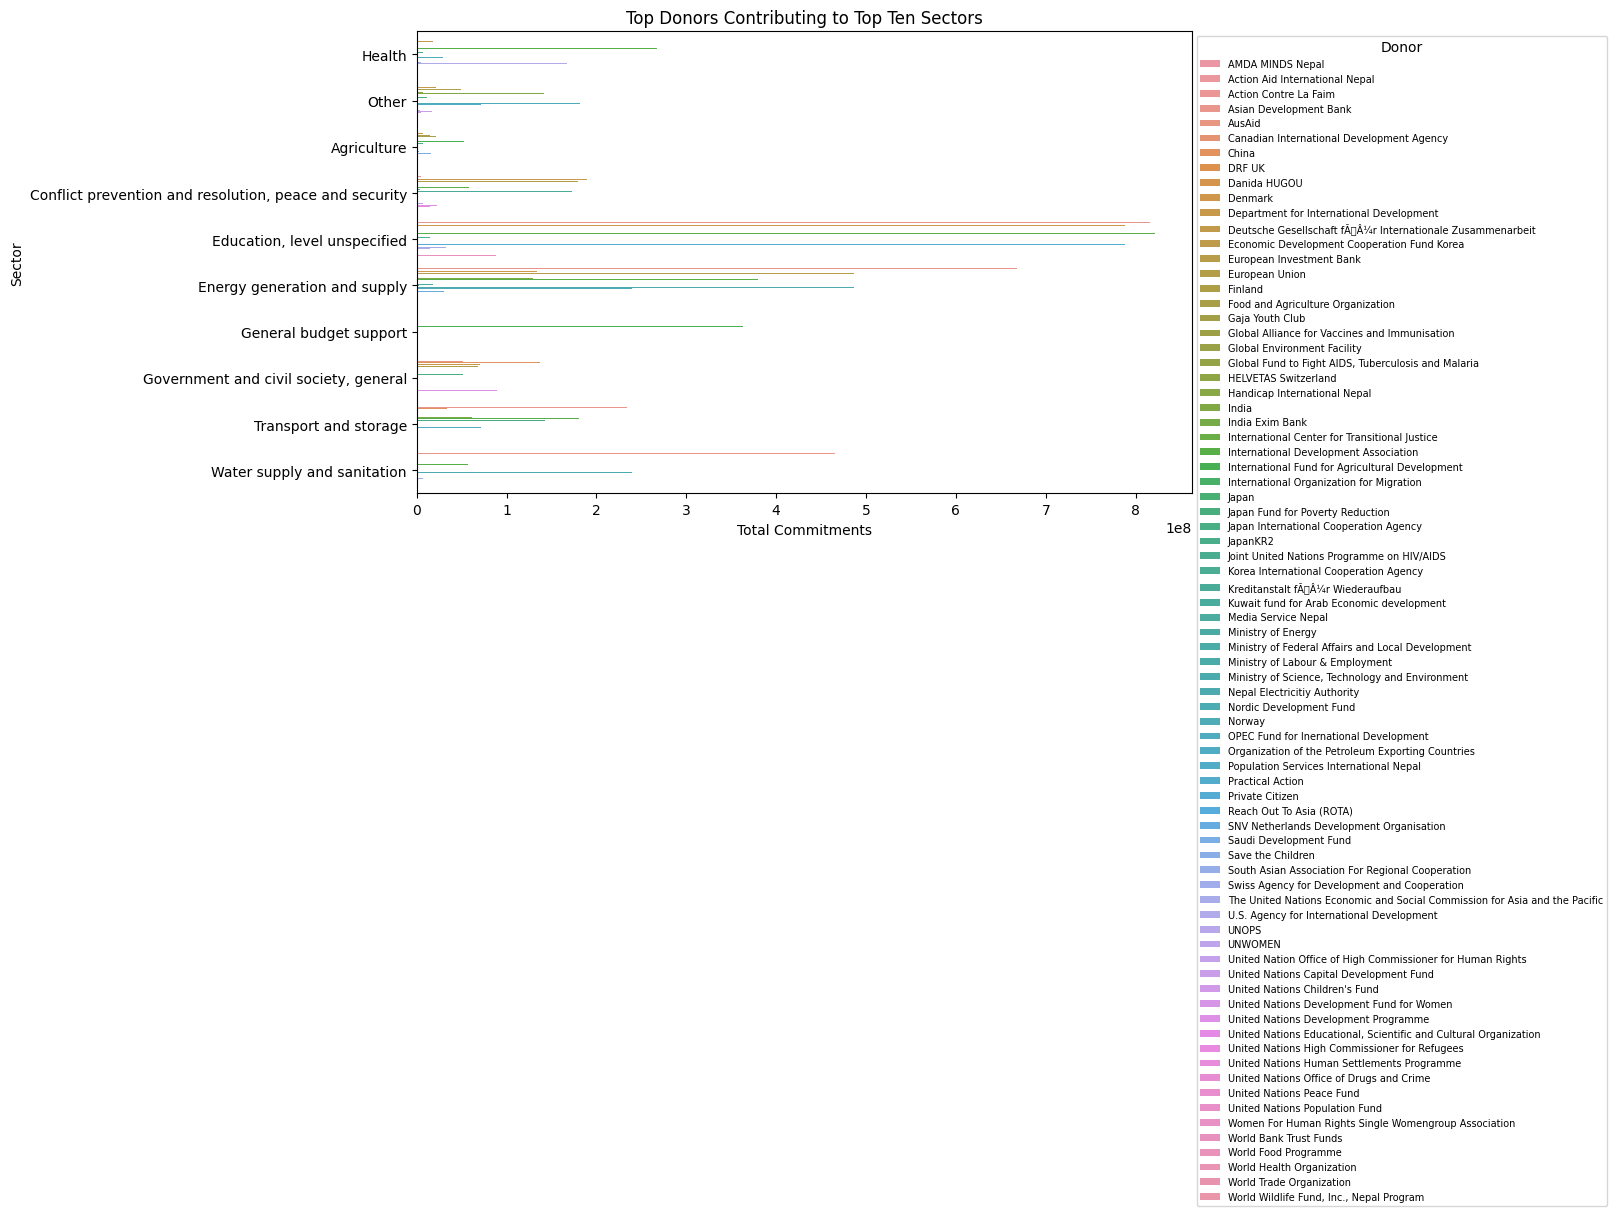

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from the provided data
data = pd.read_csv("foreign_aid_dataset.csv", encoding="latin-1")
df = pd.DataFrame(data)

# Convert 'total_commitments' column to numeric data type
df['total_commitments'] = pd.to_numeric(df['total_commitments'], errors='coerce')

# Split donors_iso2 column and explode the DataFrame
df["Donors"] = df["donors_iso2"].str.split("|")
df = df.explode("Donors")

# Group by donors and ad_sector_names, then calculate total commitments
donor_sector_contributions = (
    df.groupby(["Donors", "ad_sector_names"])["total_commitments"].sum().reset_index()
)

# Select the top ten sectors by total commitments
top_ten_sectors = donor_sector_contributions.groupby("ad_sector_names")["total_commitments"].sum().nlargest(10).index
donor_sector_contributions = donor_sector_contributions[donor_sector_contributions["ad_sector_names"].isin(top_ten_sectors)]

# Plotting the bar plot for top ten sectors
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.barplot(
    x="total_commitments",
    y="ad_sector_names",
    hue="Donors",
    data=donor_sector_contributions,
)
plt.title("Top Donors Contributing to Top Ten Sectors")
plt.xlabel("Total Commitments")
plt.ylabel("Sector")

# Legend settings
legend = plt.legend(title="Donor", bbox_to_anchor=(1, 1), loc="upper left", fontsize=7)
plt.tight_layout()
plt.show()





In the visualization, the education sector is expected to have taller bars, indicating higher total commitments from donors compared to other sectors. This suggests that education projects receive relatively more financial support from donors, highlighting the importance and prioritization of education initiatives in foreign aid projects. Conversely, the agriculture sector is likely to exhibit shorter bars, indicating lower total commitments from donors compared to other sectors. This implies that the agriculture sector receives relatively less financial support, underscoring a potential need for increased investment in agricultural development to address food security and promote sustainable practices in agriculture-dependent regions.

# Distribution of Project Durations
This implementation aims to visualize the distribution of project durations in the provided dataset of foreign aid projects.The project duration is calculated by subtracting the start date from the end date and converting it to days. To enhance the visualization, a Seaborn color palette ("husl") is chosen to add visual appeal to the histogram plot. The histogram itself displays the frequency distribution of project durations, with the x-axis representing the duration in days and the y-axis representing the frequency of projects falling within each duration bin. This visualization provides insights into the typical duration of foreign aid projects and the variability in project lengths within the dataset.


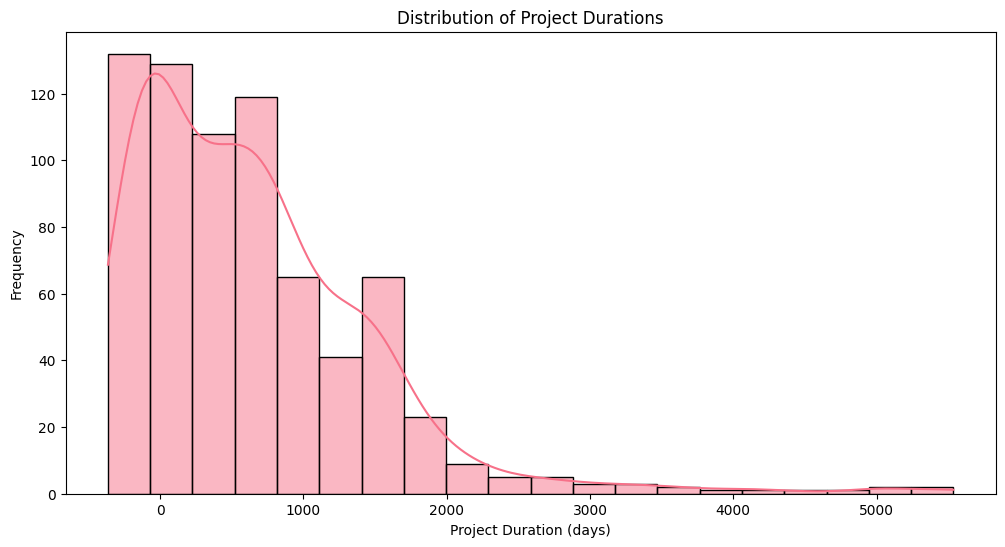

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from the provided data
data = pd.read_csv("foreign_aid_dataset.csv", encoding="latin-1")
df = pd.DataFrame(data)

# Convert to datetime
df["start_actual_isodate"] = pd.to_datetime(df["start_actual_isodate"])
df["transactions_end_year"] = pd.to_datetime(df["transactions_end_year"], format="%Y", errors='coerce')

# Drop rows with NaT values in "transactions_end_year" column
df = df.dropna(subset=["transactions_end_year"])

# Calculate project duration
df["project_duration"] = (df["transactions_end_year"] - df["start_actual_isodate"]).dt.days

# Define a Seaborn color palette
sns.set_palette("husl")

# Plotting the histogram of project durations with Seaborn color palette
plt.figure(figsize=(12, 6))
sns.histplot(df["project_duration"], bins=20, kde=True)
plt.title("Distribution of Project Durations")
plt.xlabel("Project Duration (days)")
plt.ylabel("Frequency")
plt.show()




In the result of this code, the bar that is higher at 0 project duration days and has over 120 frequency indicates that there is a significant number of projects in the dataset that have a very short duration, possibly representing projects that were completed almost immediately after they started. This suggests the presence of projects with quick turnaround times or short-term initiatives within the dataset.The line drawn on the histogram plot represents the kernel density estimation (KDE) curve. KDE is a non-parametric way to estimate the probability density function of a continuous random variable. It provides a smoothed representation of the distribution of project durations, allowing for easier visualization of underlying trends and patterns in the data. In this context, the KDE curve helps to illustrate the overall shape of the distribution and identify any peaks or clusters of project durations.

# Correlation between Total Commitments and Total Disbursements
This code aims to analyze the relationship between the total commitments and total disbursements in a dataset of foreign aid projects. It seeks to determine whether there is a correlation between the amount of money committed to projects and the actual disbursements made for those projects. By calculating the correlation coefficient and visualizing the data through a scatter plot, the code aims to provide insights into the effectiveness of project funding, identifying patterns or trends in how committed funds translate into actual disbursements. 

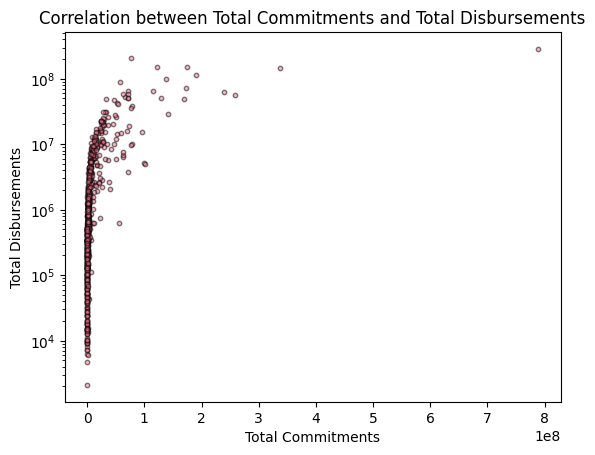

Correlation Coefficient: 0.8341277046111708


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("foreign_aid_dataset.csv")

# Convert 'total_commitments' and 'total_disbursements' columns to numeric
df['total_commitments'] = pd.to_numeric(df['total_commitments'], errors='coerce')
df['total_disbursements'] = pd.to_numeric(df['total_disbursements'], errors='coerce')

# Drop rows with missing or invalid values in either 'total_commitments' or 'total_disbursements' columns
df = df.dropna(subset=['total_commitments', 'total_disbursements'])

# Calculate the correlation coefficient
correlation = df['total_commitments'].corr(df['total_disbursements'])

# Plot the scatter plot with logarithmic y-scale and jitter
plt.scatter(df['total_commitments'], df['total_disbursements'], alpha=0.5, s=10, marker='o', edgecolors='k')
plt.title('Correlation between Total Commitments and Total Disbursements')
plt.xlabel('Total Commitments')
plt.ylabel('Total Disbursements')
plt.yscale("log")  # Apply logarithmic scale to y-axis
plt.show()

# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation}')




The scatter plot indicates a positive correlation between total commitments and total disbursements for foreign aid projects. As the total commitments increase, there is a tendency for total disbursements to increase as well, although the relationship appears to be somewhat scattered.

# Trivariate Relationship of Top Ten Sectors
This code aims to visualize the trivariate relationship between project status, sector names, and the start year of projects, focusing on the top ten sectors with the highest frequency in the dataset. It begins by loading the dataset and filtering for the top ten sectors based on their occurrence frequency. Similarly, it identifies the top ten projects based on their titles. The main visualization is a scatter plot where the x-axis represents the project status, the y-axis represents sector names, and the hue represents the start year of projects.

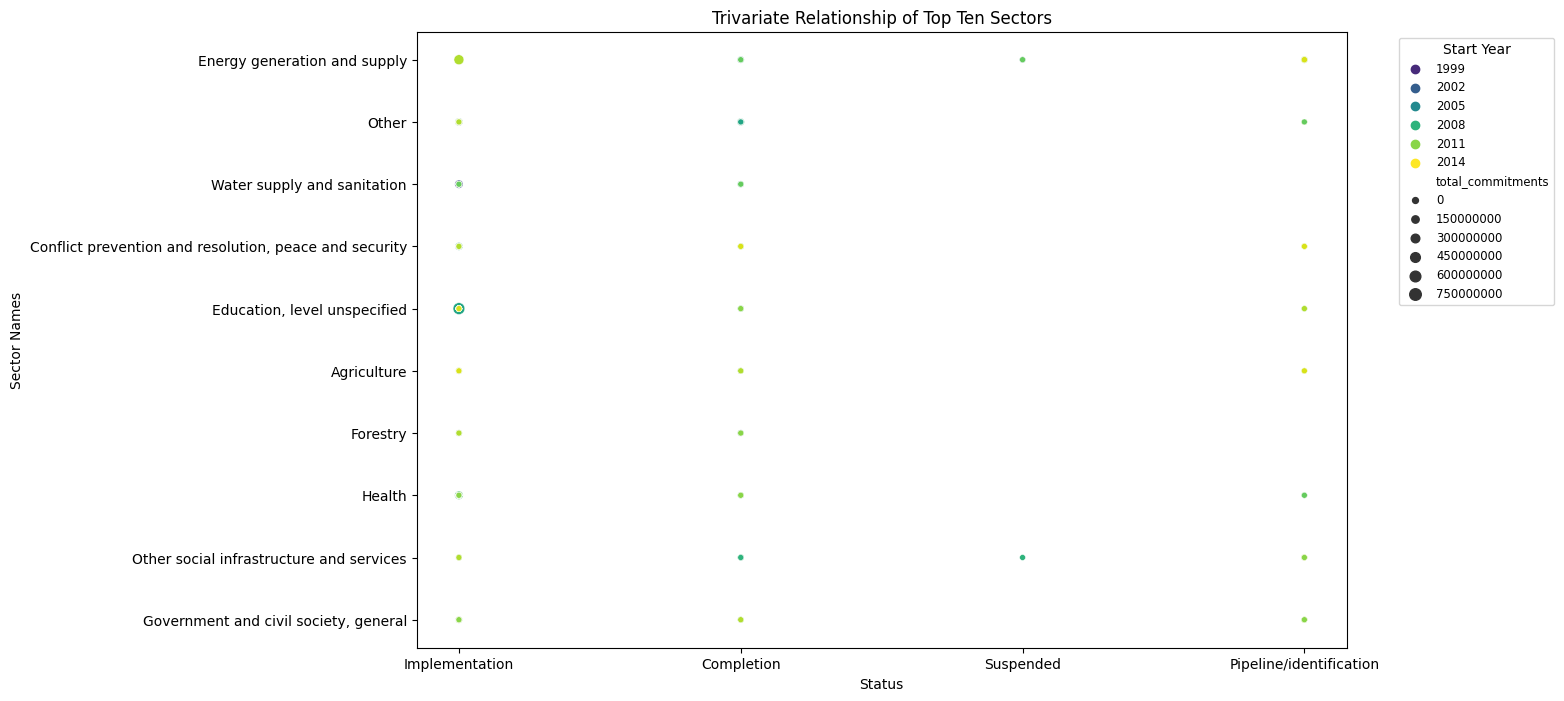

In [25]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('cleaned_datas.csv', encoding='latin-1')
df = pd.DataFrame(data)

# Filter for top ten sectors
top_ten_sectors = df['ad_sector_names'].value_counts().nlargest(10).index
df_top_ten_sectors = df[df['ad_sector_names'].isin(top_ten_sectors)]

# Filter for top ten projects
top_ten_projects = df['project_title'].value_counts().nlargest(10).index
df_top_ten_projects = df[df['project_title'].isin(top_ten_projects)]

# Plot trivariate relationship for top ten sectors
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='status', y='ad_sector_names', hue='transactions_start_year', size='total_commitments', data=df_top_ten_sectors, palette='viridis')
plt.title('Trivariate Relationship of Top Ten Sectors')
plt.xlabel('Status')
plt.ylabel('Sector Names')

# Customize legend
scatter.legend(title='Start Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Resize legend markers
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[1:], labels=labels[1:], title='Start Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()







The scatter plot visually presents the trivariate relationship between project status, sector names, and the start year of projects for the top ten sectors. Each marker on the plot represents a project, with its position determined by the project status (x-axis), sector name (y-axis), and hue indicating the start year of the project. 

# Project Duration Analysis for Top Ten Sectors


# Average Project Duration by Top Ten Sectors

This code analyzes and presents the average project duration for the top ten sectors with the highest project counts in the dataset. After loading and preprocessing the data, including converting date columns to datetime format, the code calculates the duration of each project. It then identifies the top ten sectors based on project count and filters the dataset accordingly. By computing the average project duration for each sector, the code provides insights into the typical duration of projects across different sectors.

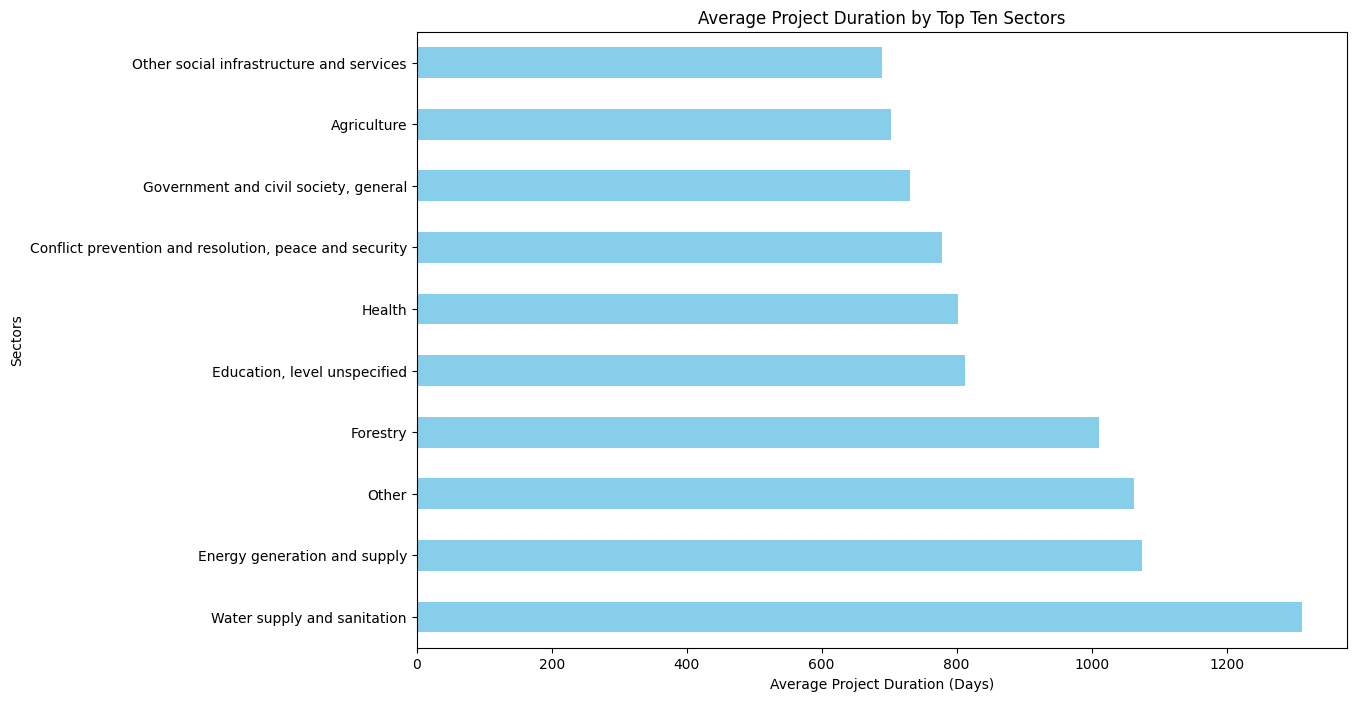

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('foreign_aid_dataset.csv', encoding='latin-1')
df = pd.DataFrame(data)

# Convert 'transactions_start_year' and 'transactions_end_year' to datetime
df["transactions_start_year"] = pd.to_datetime(df["transactions_start_year"], format='%Y', errors='coerce')
df["transactions_end_year"] = pd.to_datetime(df["transactions_end_year"], format='%Y', errors='coerce')

# Calculate project duration
df['project_duration'] = (df['transactions_end_year'] - df['transactions_start_year']).dt.days

# Get top ten sectors by number of projects
top_ten_sectors = df['ad_sector_names'].value_counts().nlargest(10).index

# Filter the dataframe for top ten sectors
df_top_ten_sectors = df[df['ad_sector_names'].isin(top_ten_sectors)]

# Calculate the average project duration by sector
average_duration_by_sector = df_top_ten_sectors.groupby('ad_sector_names')['project_duration'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
average_duration_by_sector.plot(kind='barh', color='skyblue')  # Horizontal bar chart
plt.title('Average Project Duration by Top Ten Sectors')
plt.xlabel('Average Project Duration (Days)')
plt.ylabel('Sectors')
plt.show()





The analysis reveals that the average project duration for the "Water supply and sanitation" sector exceeds 1200 days, indicating that projects in this sector typically span a longer period. On the other hand, projects in the "Social infrastructure" sector have an average duration ranging from 600 to 800 days. This suggests that projects related to social infrastructure tend to be completed within a relatively shorter timeframe compared to those in the water supply and sanitation sector. 

# Bivariate Analysis: Project Status vs. Project Duration
It visualizes the bivariate relationship using a boxplot, where the x-axis represents the project status and the y-axis represents the project duration in years. The boxplot allows for the comparison of project durations between different statuses, providing insights into how the duration varies depending on the project's stage.

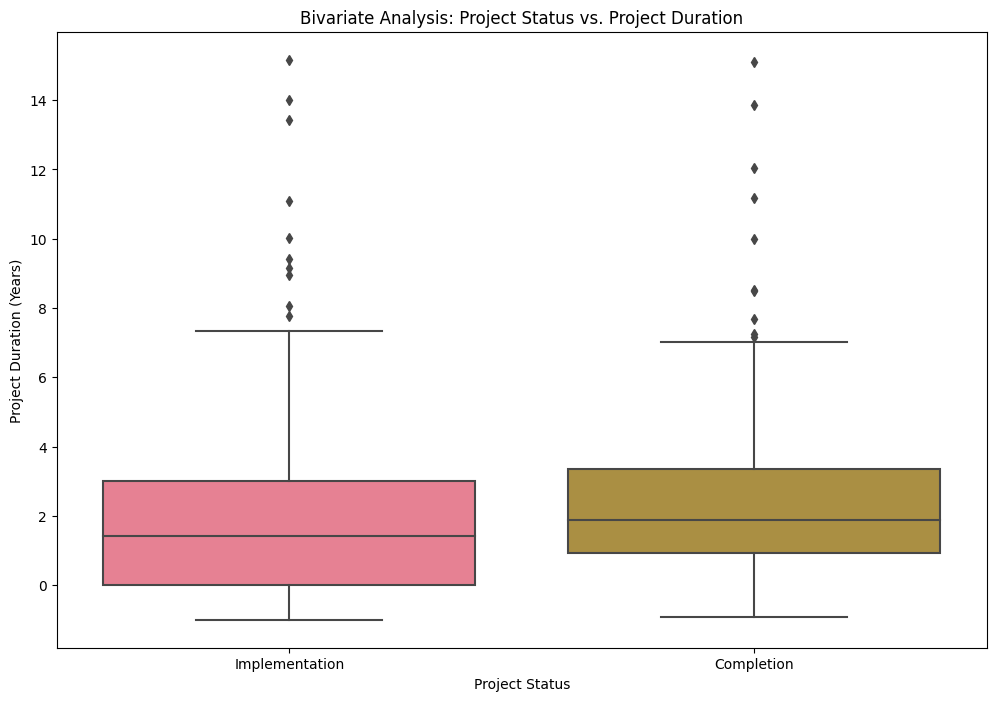

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('foreign_aid_dataset.csv', encoding='latin-1')
df = pd.DataFrame(data)

# Convert 'start_actual_isodate' and 'transactions_end_year' to datetime
df['start_actual_isodate'] = pd.to_datetime(df['start_actual_isodate'], errors='coerce')
df['transactions_end_year'] = pd.to_datetime(df['transactions_end_year'], errors='coerce')

# Drop rows with missing values in either 'start_actual_isodate' or 'transactions_end_year'
df = df.dropna(subset=['start_actual_isodate', 'transactions_end_year'])

# Calculate project duration in years
df['project_duration'] = (df['transactions_end_year'] - df['start_actual_isodate']).dt.days / 365

# Plotting the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='status', y='project_duration', order=['Implementation', 'Completion'])
plt.title('Bivariate Analysis: Project Status vs. Project Duration')
plt.xlabel('Project Status')
plt.ylabel('Project Duration (Years)')
plt.show()


The analysis of the bivariate relationship between project status and project duration reveals several key insights. Firstly, the implementation phase exhibits more outliers compared to completion, suggesting greater variability in project durations during implementation. The third quartile (Q3) for implementation falls between 6 and 8 years, indicating that the majority of implementation projects have a duration within this range. Completion projects also have a median duration slightly below implementation but still within the 6 to 8-year range. The second quartile (Q2) for both implementation and completion is between 0 and 2 years, although completion projects tend to have durations slightly higher within this range. Finally, the first quartile (Q1) for both implementation and completion is below 0 years, indicating that some projects have negative durations, possibly due to errors or incomplete data. However, completion projects have a slightly higher Q1, suggesting that they tend to have slightly longer durations compared to implementation projects.

# Top Donors Based on Number of Projects 
This code aims to visualize the distribution of projects among different donors, specifically focusing on the top ten donors with the highest number of projects. It first counts the occurrences of each donor in the dataset and selects the top ten donors based on the highest number of projects they have funded. Then, it creates a horizontal bar plot to represent the number of projects associated with each of these top donors, with the donors' ISO2 codes displayed on the y-axis and the corresponding number of projects on the x-axis.

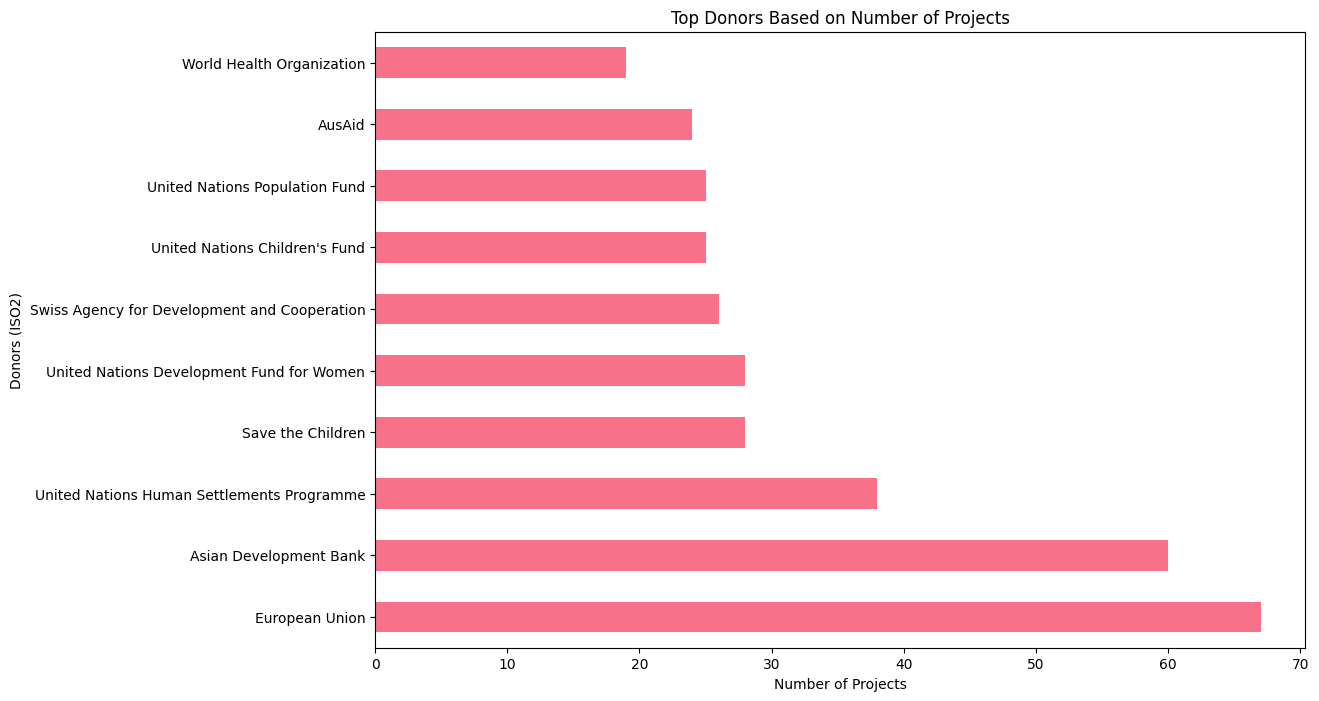

In [28]:
donor_counts = df['donors_iso2'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))

donor_counts[:10].plot(kind='barh', ax=ax)  # Use 'barh' for horizontal bar plot

plt.title('Top Donors Based on Number of Projects')
plt.xlabel('Number of Projects')  # Label the x-axis as number of projects
plt.ylabel('Donors (ISO2)')  # Label the y-axis as donors
plt.show()



The visualization indicates that the European Union (EU) stands out as the donor with the highest number of projects, with its bar being the longest among the top ten donors. The number of projects associated with the EU falls within the range of 60 to 70, showcasing its significant contribution to foreign aid initiatives. Conversely, the World Health Organization (WHO) has the shortest bar, indicating the lowest number of projects among the top donors, with the number being approximately 20.

# Heatmap - Correlation Matrix of Selected Columns

The code wants to implement a visualization of the correlation matrix between selected columns in a dataset of foreign aid projects. Specifically, it aims to show how the year of transaction start, total commitments, and total disbursements are correlated with each other. By generating a heatmap of the correlation matrix, the code enables a visual exploration of the relationships between these variables. This visualization helps to identify any patterns or trends in the data, such as whether increases in one variable correspond to increases or decreases in another variable, or if there is no significant correlation between certain variables.

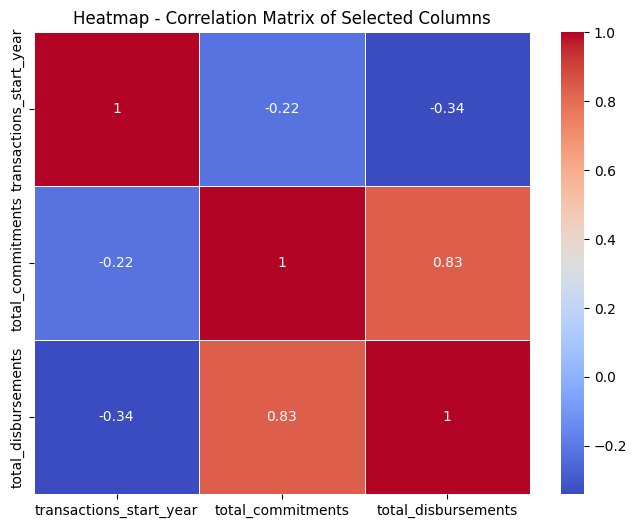

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('foreign_aid_dataset.csv', encoding='latin-1')
df = pd.DataFrame(data)

# Convert 'transactions_start_year', 'total_commitments', and 'total_disbursements' to numeric, coerce errors to NaN
df['transactions_start_year'] = pd.to_numeric(df['transactions_start_year'], errors='coerce')
df['total_commitments'] = pd.to_numeric(df['total_commitments'], errors='coerce')
df['total_disbursements'] = pd.to_numeric(df['total_disbursements'], errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=['transactions_start_year', 'total_commitments', 'total_disbursements'])

# Select columns for heatmap
selected_columns = ['transactions_start_year', 'total_commitments', 'total_disbursements']
heatmap_data = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Heatmap - Correlation Matrix of Selected Columns')
plt.show()


# Top Projects by Duration Over Time

The script imports data from a CSV file and preprocesses it using pandas. It calculates project durations and identifies the top projects based on duration. Matplotlib is used to visualize the top projects' durations over time in a horizontal bar plot. The plot displays project titles on the y-axis and project durations across years on the x-axis. Axis labels, a title, grid lines, and expanded axis limits are applied for clarity.

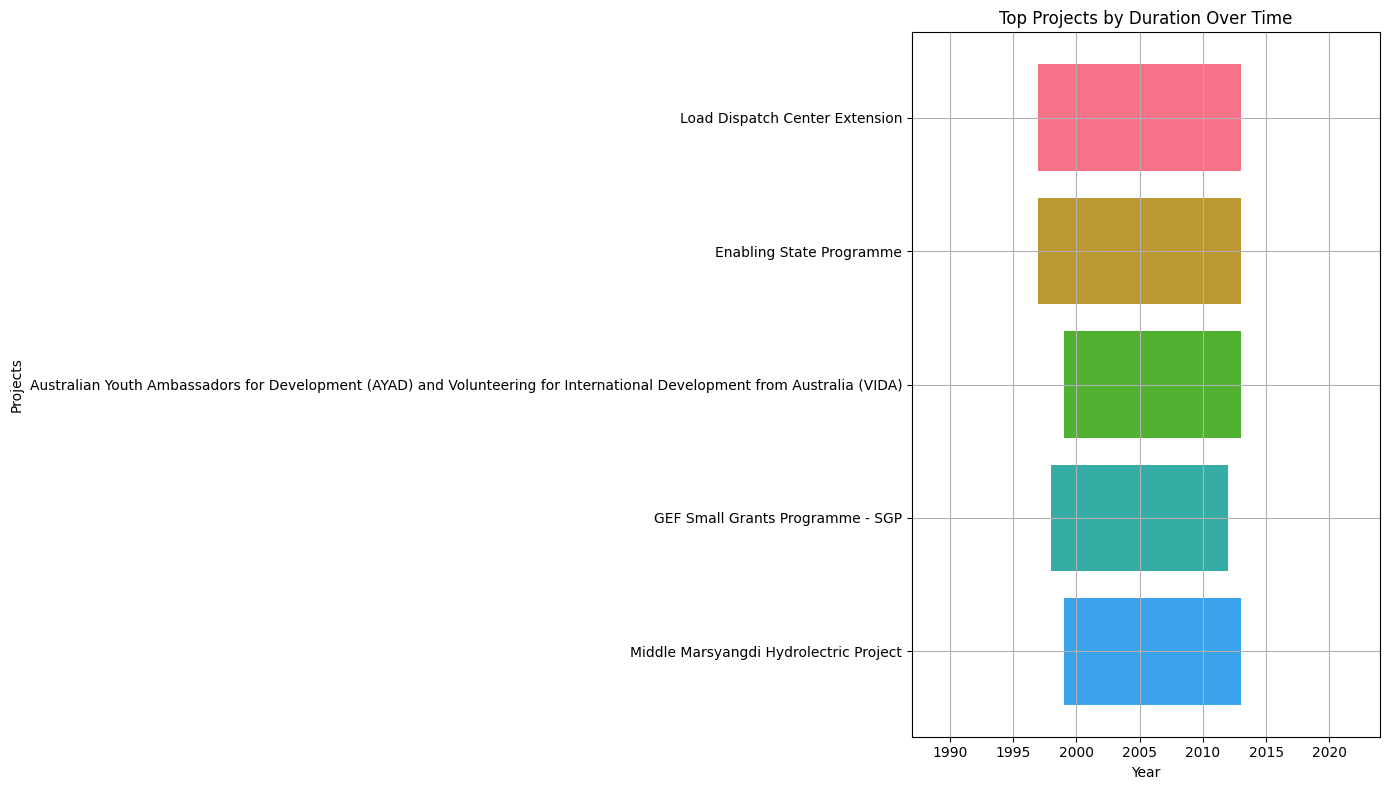

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV
df = pd.read_csv("foreign_aid_dataset.csv")

# Convert 'start_actual_isodate' to datetime
df['start_date'] = pd.to_datetime(df['start_actual_isodate'], errors='coerce')

# Handle missing values and use 'transactions_start_year' as fallback
df['start_date'] = df['start_date'].fillna(pd.to_datetime(df['transactions_start_year'], format='%Y', errors='coerce'))

# Convert 'transactions_end_year' and 'transactions_start_year' to numeric
df['transactions_end_year'] = pd.to_numeric(df['transactions_end_year'], errors='coerce')
df['transactions_start_year'] = pd.to_numeric(df['transactions_start_year'], errors='coerce')

# Calculate project duration
df['duration'] = df['transactions_end_year'] - df['transactions_start_year']

# Sort DataFrame by duration
df = df.sort_values(by='duration', ascending=False)

# Select top projects (e.g., top 5)
top_projects = df.head(5)

# Plotting
plt.figure(figsize=(14, 8))  # Increase the figure size for better readability
for index, row in top_projects.iterrows():
    plt.barh(row['project_title'], row['duration'], left=row['transactions_start_year'], label="Duration")

plt.xlabel('Year')
plt.ylabel('Projects')
plt.title('Top Projects by Duration Over Time')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis to display projects from top to bottom

# Set x-axis limits to include a broader time range (e.g., 10 years before the earliest start year and 10 years after the latest end year)
start_year = df['transactions_start_year'].min() - 10
end_year = df['transactions_end_year'].max() + 10
plt.xlim(start_year, end_year)

plt.tight_layout()
plt.show()






